In [10]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [11]:

train = pd.read_csv('train_tweet.csv', encoding='utf-8')
test = pd.read_csv('test_tweets.csv', encoding='utf-8')
print(train.shape)
print(test.shape)

(31962, 3)
(17197, 2)


In [12]:
train.head()

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation


In [13]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,"31966,""is the hp and the cursed child book up ...",NaN
4,"31967,"" 3rd #bihday to my amazing, hilarious ...",NaN


In [14]:
train.isnull().any()
test.isnull().any()

id       False
tweet     True
dtype: bool

In [15]:
# checking out the negative comments from the train set

train[train['label'] == 0].head(10)


,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...
7,8,0.0,the next school year is the year for exams.Ã°Â...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...


In [16]:
# checking out the postive comments from the train set 

train[train['label'] == 1].head(10)

,id,label,tweet
13,14,1.0,@user #cnn calls #michigan middle school 'buil...
14,15,1.0,no comment! in #australia #opkillingbay #se...
17,18,1.0,retweet if you agree!
23,24,1.0,@user @user lumpy says i am a . prove it lumpy.
34,35,1.0,it's unbelievable that in the 21st century we'...
56,57,1.0,@user lets fight against #love #peace
68,69,1.0,Ã°ÂŸÂ˜Â©the white establishment can't have blk...
114,115,1.0,@user why not @user mocked obama for being bla...
151,152,1.0,yes it's when you call #michelleobama a goril...
192,193,1.0,you might be a libtard if... #libtard #sjw #l...


<AxesSubplot:>

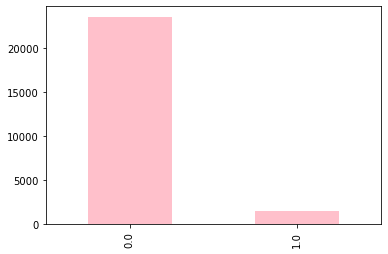

In [17]:
train['label'].value_counts().plot.bar(color = 'pink', figsize = (6, 4))

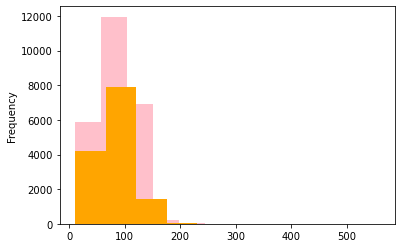

In [18]:
# checking the distribution of tweets in the data

length_train = train['tweet'].str.len().plot.hist(color = 'pink', figsize = (6, 4))
length_test = test['tweet'].str.len().plot.hist(color = 'orange', figsize = (6, 4))

In [19]:
# adding a column to represent the length of the tweet

train['len'] = train['tweet'].str.len()
test['len'] = test['tweet'].str.len()

train.head(10)

,id,label,tweet,len
0,1,0.0,@user when a father is dysfunctional and is s...,102.0
1,2,0.0,@user @user thanks for #lyft credit i can't us...,122.0
2,3,0.0,bihday your majesty,21.0
3,4,0.0,#model i love u take with u all the time in ...,118.0
4,5,0.0,factsguide: society now #motivation,39.0
5,6,0.0,[2/2] huge fan fare and big talking before the...,116.0
6,7,0.0,@user camping tomorrow @user @user @user @use...,77.0
7,8,0.0,the next school year is the year for exams.Ã°Â...,151.0
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,90.0
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,50.0


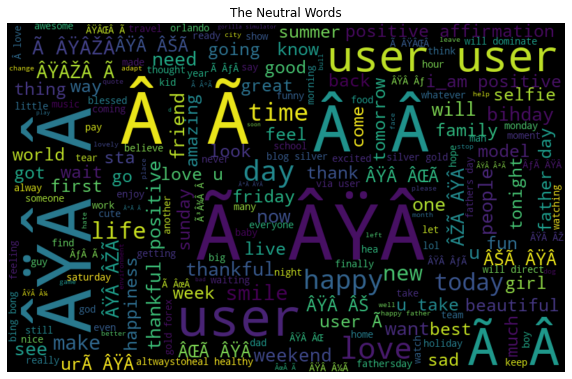

In [22]:
from wordcloud import WordCloud
normal_words =' '.join([text for text in train['tweet'][train['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

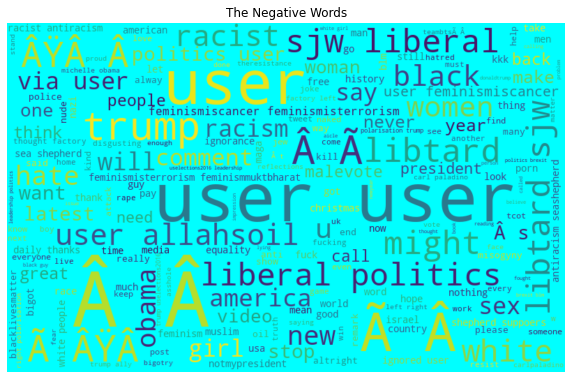

In [23]:
negative_words =' '.join([text for text in train['tweet'][train['label'] == 1]])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

In [24]:
# collecting the hashtags

def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [26]:
import re
# extracting hashtags from non racist/sexist tweets
HT_regular = hashtag_extract(train['tweet'][train['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(train['tweet'][train['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

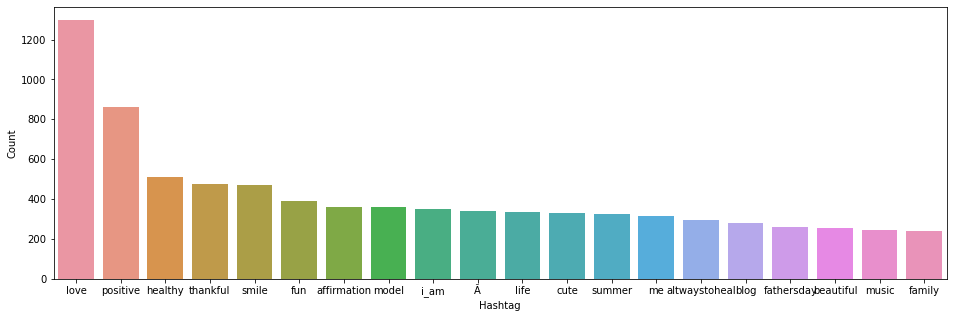

In [28]:
import nltk
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

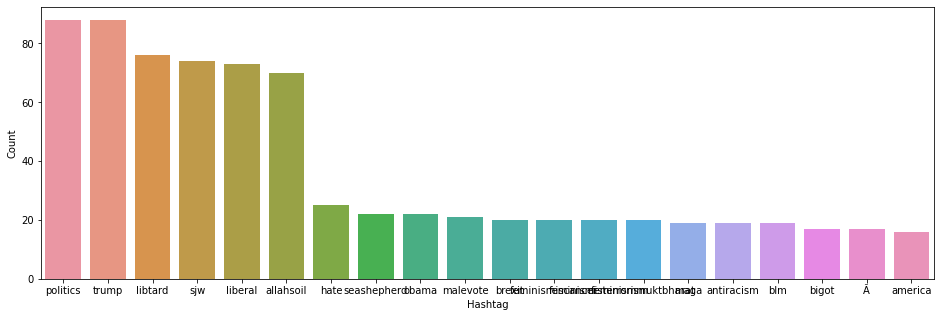

In [29]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()